In [15]:
import sys
import numpy as np
import sounddevice as sd


sys.path.append("/Users/carlosedm10/projects/college/TDS")
import utils
from scipy.io import wavfile


# Path to the .wav files
audio = "/Users/carlosedm10/projects/college/TDSC/Files/v1.wav"
audio_ve = "/Users/carlosedm10/projects/college/TDSC/Files/v_e.wav"
audio_vs = "/Users/carlosedm10/projects/college/TDSC/Files/v_s.wav"
audios = [audio, audio_ve, audio_vs]

# Exercise 1

---------- Audio 1 analysis ----------
Number of channels: 1
Sampling frequency: 16000
Bits per sample:  64
Bit rate: 1024.0 kbps
Data type: float64
The data type of the elements is double (float64).


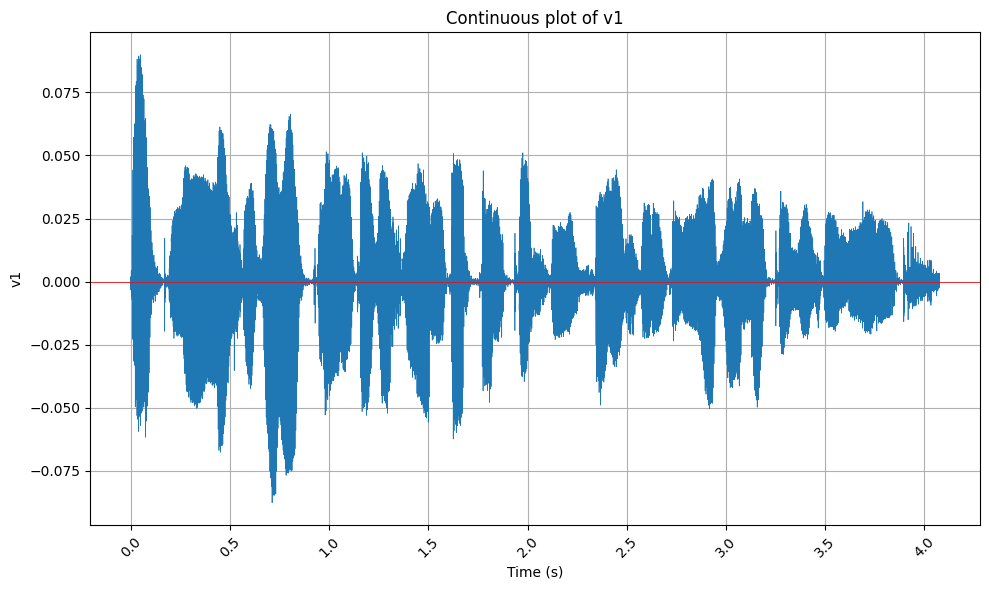

---------- Audio 2 analysis ----------
Number of channels: 1
Sampling frequency: 16000
Bits per sample:  64
Bit rate: 1024.0 kbps
Data type: float64
The data type of the elements is double (float64).


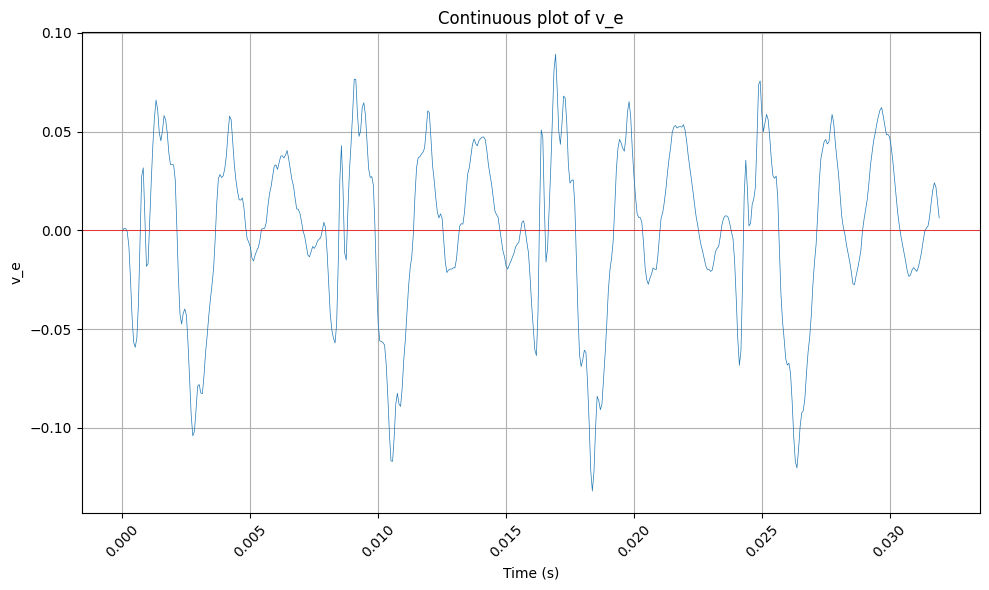

---------- Audio 3 analysis ----------
Number of channels: 1
Sampling frequency: 16000
Bits per sample:  64
Bit rate: 1024.0 kbps
Data type: float64
The data type of the elements is double (float64).


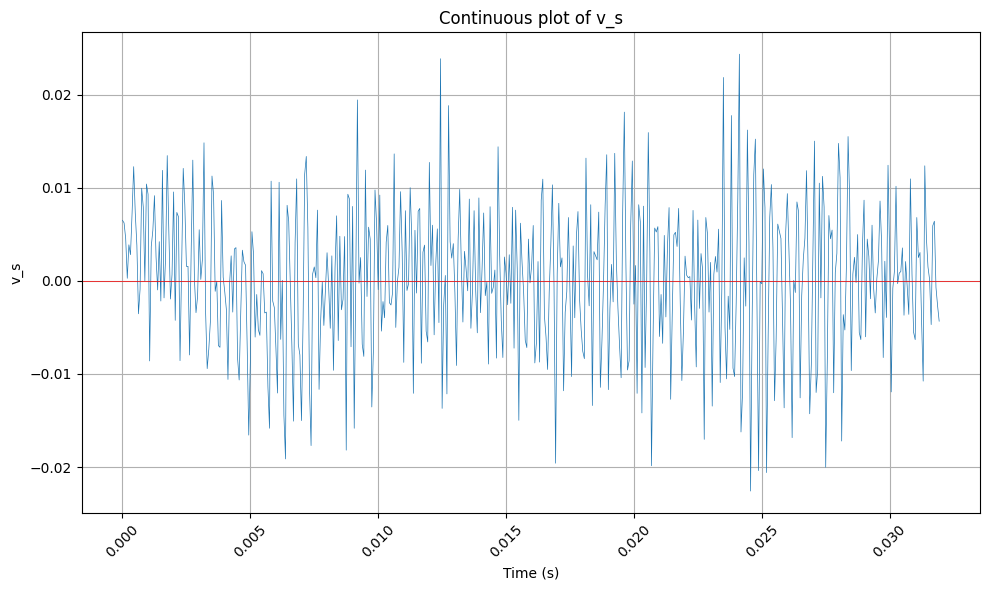

In [17]:
for n, audio in enumerate(audios):

    print("-" * 10, f"Audio {n+1} analysis", "-" * 10)

    freq, audio_data = wavfile.read(audio)
    audio_data = audio_data / 2**15  # Normalize the data
    time_vector = np.arange(len(audio_data)) / freq

    # Number of channels
    if len(audio_data.shape) == 1:
        n_channels = 1  # Mono
    else:
        n_channels = audio_data.shape[1]  # Stereo

    print(f"Number of channels: {n_channels}")

    # Sampling frequency of the audio
    print(f"Sampling frequency: {freq}")

    # Sampling period
    print(f"Sampling period: {1/freq}")

    # Binary rate bits/sample
    print(f"Bits per sample: ", audio_data.dtype.itemsize * 8)

    print(f"Bit rate: {audio_data.dtype.itemsize * 8 * freq / 1000} kbps")

    # Check if the data type of the elements is double (float64)
    print(f"Data type: {audio_data.dtype}")
    if audio_data.dtype == np.float64:
        print("The data type of the elements is double (float64).")
    else:
        print("The data type of the elements is not double (float64).")

    utils.continuous_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        linewidth=0.5,
    )

    sd.play(audio_data, freq)
    sd.wait()

## 1.2 Checking for the tone

---------- Tone frequency analysis ----------
Tone frequency: 750.0 Hz


/var/folders/n2/bpxkh5j55nx3ym9bf5t445jw0000gn/T/ipykernel_97798/1993152041.py:35: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=512).
  plt.specgram(audio_data, Fs=freq, NFFT=1024, cmap="viridis")


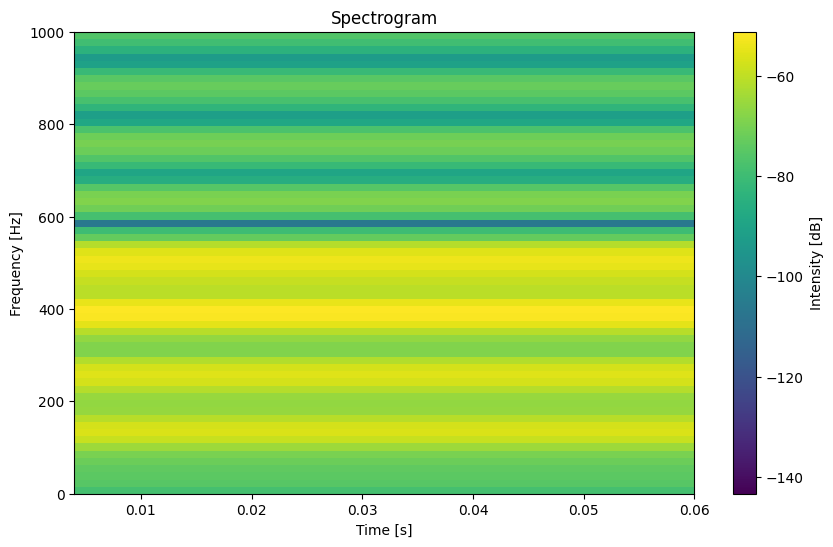

In [45]:
# Looking for tone frequency of audio _ve.wav


import librosa
from matplotlib import pyplot as plt
from scipy import signal


def tone_frequency(audio_data, freq):
    """
    This method calculates the frequency of the tone in the audio data.
    """
    # Get the frequency of the tone
    tone = np.fft.fft(audio_data)  # Apply Fast Fourier Transform to the audio data
    tone = np.abs(tone)  # Take the absolute value of the Fourier transformed data
    tone = tone[: len(tone) // 2]  # Take only the positive frequencies.
    tone = tone / tone.max()  # Normalize the data
    tone_freq = (
        np.argmax(tone) * freq / len(tone)
    )  # Find the index of the maximum value and convert it to frequency
    return tone_freq


print("-" * 10, "Tone frequency analysis", "-" * 10)
freq, audio_data = wavfile.read(audio_ve)
fft = np.fft.fft(audio_data)
audio_data = audio_data / 2**15  # Normalize the data
tone_freq = tone_frequency(audio_data, freq)
print(f"Tone frequency: {tone_freq} Hz")

# Seeing the spectrogram


plt.figure(figsize=(10, 6))
plt.specgram(audio_data, Fs=freq, NFFT=1024, cmap="viridis")
plt.title("Spectrogram")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label="Intensity [dB]")
plt.ylim([0, 1000])
plt.show()